Accuracy: 0.77


C:\Users\PC\AppData\Local\Temp\ipykernel_79280\1662798978.py:74: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


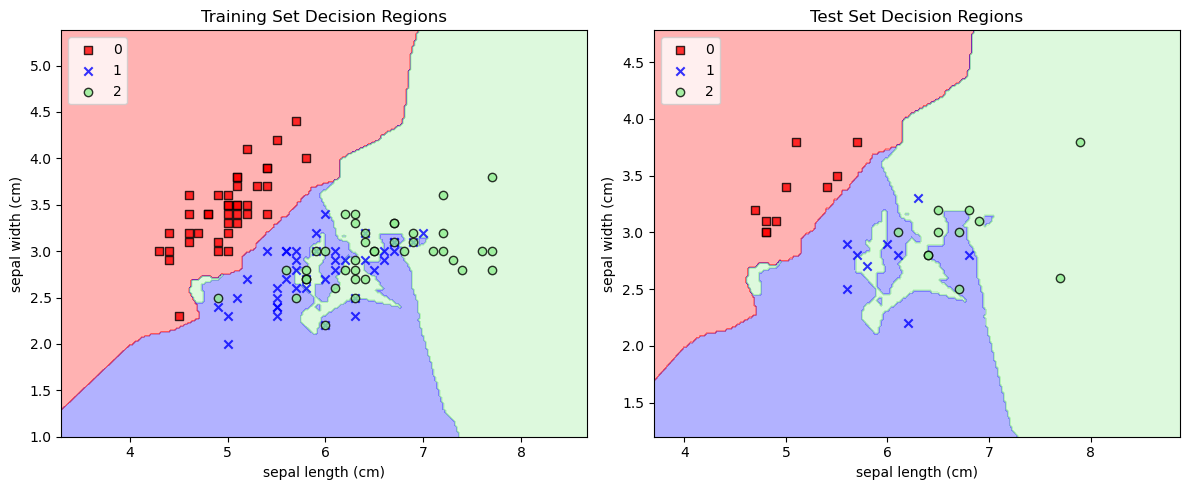


Detailed Evaluation:
True labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predictions: [1 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 1 1 2 0 0]
Misclassified samples: 7


In [2]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load dataset (Iris dataset as example)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# K-Nearest Neighbors implementation
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Initialize and train the classifier
knn = KNearestNeighbors(k=3)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualization function (for 2D data)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot training data
plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, classifier=knn)
plt.title('Training Set Decision Regions')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')

# Plot test data
plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, classifier=knn)
plt.title('Test Set Decision Regions')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Print detailed evaluation
print("\nDetailed Evaluation:")
print("True labels:", y_test)
print("Predictions:", predictions)
print("Misclassified samples:", np.sum(predictions != y_test))

Accuracy: 0.90


C:\Users\PC\AppData\Local\Temp\ipykernel_79280\1662798978.py:74: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


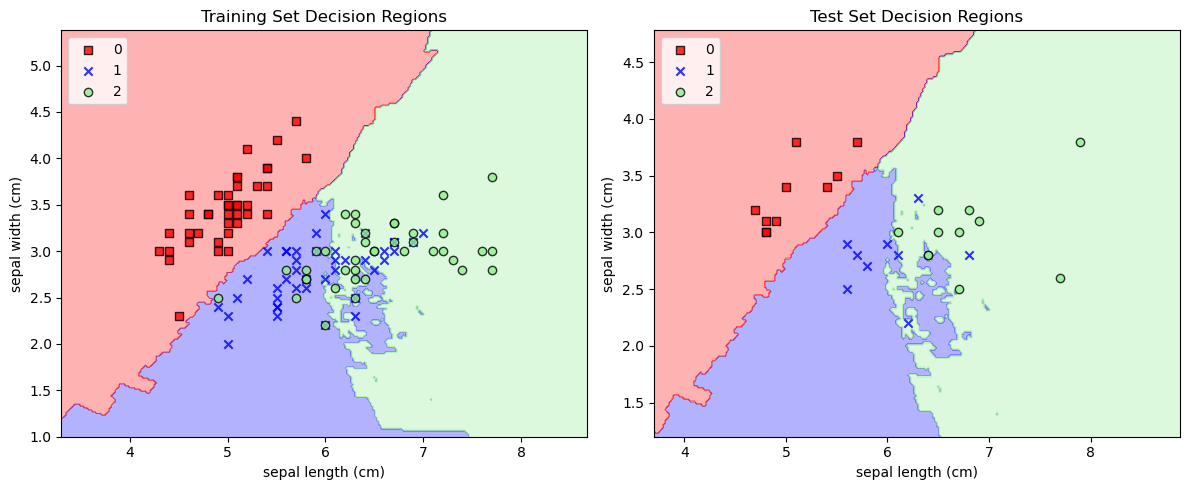


Detailed Evaluation:
True labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predictions: [1 0 2 1 2 0 1 2 2 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Misclassified samples: 3


In [4]:
# K-Nearest Neighbors implementation
class NeffNearestNeighbors:
    def __init__(self, beta=1.0):
        self.beta = beta

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        x = np.array(distances)
        x = np.abs(x)
        x_norm = x/np.sum(x)
        Neff = int(np.floor(self.beta/np.sum(x_norm**2)))
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:(len(self.X_train)-Neff)]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Initialize and train the classifier
knn = NeffNearestNeighbors(beta=1.0)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")


# Visualize the results
plt.figure(figsize=(12, 5))

# Plot training data
plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, classifier=knn)
plt.title('Training Set Decision Regions')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')

# Plot test data
plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, classifier=knn)
plt.title('Test Set Decision Regions')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Print detailed evaluation
print("\nDetailed Evaluation:")
print("True labels:", y_test)
print("Predictions:", predictions)
print("Misclassified samples:", np.sum(predictions != y_test))